In [1]:
import pandas as pd
import glob
import os

path = 'datasets/the_boys' # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))
print(all_files)
li = list()
high_level = pd.DataFrame()
for filename in all_files:
    df = pd.read_csv(filename)
    #df.insert(0, 'Episode', filename.split("\\")[1].split(".")[0])
    name = filename.split("\\")[1].split(".")[0]
    df['Season'] = name[1:3]
    df['Episode'] = name[4:6]
    df['Duration'] = df['end'] - df['start']
    
    li.append(df)
df = pd.concat(li, ignore_index = True)

['datasets/the_boys\\s01e01.csv', 'datasets/the_boys\\s01e02.csv', 'datasets/the_boys\\s01e03.csv', 'datasets/the_boys\\s01e04.csv', 'datasets/the_boys\\s01e05.csv', 'datasets/the_boys\\s01e06.csv', 'datasets/the_boys\\s01e07.csv', 'datasets/the_boys\\s01e08.csv', 'datasets/the_boys\\s02e01.csv', 'datasets/the_boys\\s02e02.csv', 'datasets/the_boys\\s02e03.csv', 'datasets/the_boys\\s02e04.csv', 'datasets/the_boys\\s02e05.csv', 'datasets/the_boys\\s02e06.csv', 'datasets/the_boys\\s02e07.csv', 'datasets/the_boys\\s02e08.csv', 'datasets/the_boys\\s03e01.csv', 'datasets/the_boys\\s03e02.csv', 'datasets/the_boys\\s03e03.csv', 'datasets/the_boys\\s03e04.csv', 'datasets/the_boys\\s03e05.csv', 'datasets/the_boys\\s03e06.csv', 'datasets/the_boys\\s03e07.csv', 'datasets/the_boys\\s03e08.csv']


In [30]:
df.loc[df.nconst == 'nm4425051', 'character'] = 'Hughie Campbell'

In [2]:
df[['Season','Episode']].groupby('Season').nunique()

,Episode
Season,
01,8
02,8
03,8


In [3]:
# Characters per season

df[['Season','nconst']].groupby('Season').nunique()

,nconst
Season,
01,129
02,109
03,123


In [4]:
# Characters per episode
df[['Season','Episode','nconst']].groupby(['Season','Episode']).nunique()

nconst
Season Episode        
01     01           30
       02           31
       03           30
       04           34
       05           32
       06           43
       07           27
       08           25
02     01           37
       02           29
       03           31
       04           29
       05           35
       06           27
       07           31
       08           28
03     01           39
       02           37
       03           42
       04           29
       05           34
       06           26
       07           41
       08           34

In [84]:
people_df = df[['nconst','character']].groupby(['nconst','character']).nunique()

In [87]:
people_df

Empty DataFrame
Columns: []
Index: [(nm0000223, Madelyn Stillwell), (nm0000708, Alastair (movie version)), (nm0000708, Billy Zane), (nm0001218, Gunpowder), (nm0001663, The Legend), (nm0002064, Meerkat Stan Edgar), (nm0002064, Stan Edgar), (nm0005120, Dr. Damien Hodgman), (nm0005286, Mesmer), (nm0005346, Tara Reid), (nm0007664, Filipino Guy), (nm0010075, Eagle Soldier Boy), (nm0010075, Soldier Boy), (nm0019972, Vought Executive), (nm0020329, Popclaw), (nm0022306, Mother's Milk), (nm0022306, Mother’s Milk), (nm0028625, Senator Calhoun), (nm0035334, Mamasan Matron), (nm0039162, Lamplighter), (nm0039162, Nurse), (nm0042336, Priest), (nm0057217, Seth), (nm0057217, Seth Reed), (nm0064769, Robert Singer), (nm0064769, Secretary of Defense Robert A. Singer), (nm0067289, Jeff), (nm0072648, Ezekiel), (nm0095746, Horse Tessa), (nm0095746, Tessa), (nm0126260, Adam Bourke), (nm0145009, Vanessa), (nm0177684, Security Guard), (nm0183698, Katie Couric), (nm0193639, Donna January), (nm0217221, Two Birds), (nm0231283, Jonah Vogelbaum), (nm0243678, VNN News Anchor), (nm0244432, MM's Grandpa), (nm0249378, Cameron Coleman), (nm0261170, Susan Rayner), (nm0261170, Susan Raynor), (nm0265994, Colby's Dad), (nm0266422, Jimmy Fallon), (nm0312334, Oligarch), (nm0321047, Randall Skilton), (nm0337020, Dennis), (nm0341289, Lois), (nm0342399, Agent Bill Pearson), (nm0369241, Pastor), (nm0372961, Carol), (nm0390229, Crimson Countess), (nm0390229, Fox Crimson Countess), (nm0391738, Dr. Park), (nm0451039, Lydia Parker), (nm0498083, Doctor), (nm0501999, Christopher Lennertz), (nm0507097, Valerie), (nm0510499, Kenji Miyashiro), (nm0531734, Pat Willis), (nm0533884, Bill Marsh), (nm0609150, Gary), (nm0625664, Maeve's Dad), (nm0629762, Sheriff Ed Flanagan), (nm0630149, Connie Butcher), (nm0633604, Sam), (nm0633604, Sam Butcher), (nm0637992, Mayor of Baltimore), (nm0640669, Self), (nm0651456, Desperate Thief #1), (nm0652663, Gills), (nm0660357, Veronica Barassi), (nm0668702, U.S.S.R. Officer), (nm0670408, Hugh Campbell), (nm0670408, Hughie's Father), (nm0677310, Sweet Mom), (nm0715250, Tina), (nm0732309, Grace Mallory), (nm0736622, Seth Rogen), (nm0736622, SirCumsALot779), (nm0804670, Reporter), (nm0865626, Courtenay), (nm0877304, Trevor), (nm0881631, Billy Butcher), (nm0881631, Butcher), (nm0899681, Alastair Adana), (nm0917060, Blue Hawk), (nm0948580, Colby's Dr.), (nm0998489, Evan Lambert), (nm10104439, Second Frat Boy), (nm10113394, Young The Female), (nm1032698, Kuldeep Singh), (nm10445529, Cool Girl), (nm10472416, Young Starlight), (nm1047968, MM's Dad), (nm10492805, Young Mesmer), (nm10503336, Syrian Boy), (nm1051091, Daniel Prestia), (nm10651052, Entertainment Reporter), (nm10651052, Interviewer), ...]

[323 rows x 0 columns]

In [5]:
df[df['nconst'] == 'nm4425051'][['nconst','character']].drop_duplicates()

,nconst,character
7,nm4425051,Hughie Campbell
1467,nm4425051,Hughie


<AxesSubplot: xlabel='character'>

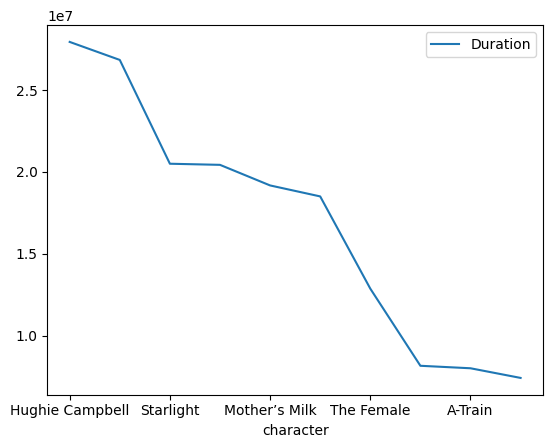

In [17]:
aggregation_functions = {'Duration': 'sum', 'nconst': 'first', 'character' : 'first',}
df_new = df.groupby(df['nconst']).aggregate(aggregation_functions)
df_new = df_new.sort_values('Duration', ascending = False)
df_new.head(10).plot(x='character')

In [88]:
appearance_df = pd.DataFrame(df.groupby(['Season', 'Episode','nconst'],as_index =False)['Duration'].sum())
appearance_df['Duration'] = appearance_df['Duration'].astype(int)


graph_pd = pd.DataFrame()
for character in df_new['nconst'].head(20):
    print(character)
    character_df = appearance_df.copy()[appearance_df['nconst']==character]
    character_df.set_index(['Season', 'Episode'], inplace= True)
    character_df.sort_index(inplace=True)
    character_df[f'{character}_Time'] = character_df['Duration']
    print(appearance_df['Duration'])
    if(graph_pd.empty):
        graph_pd = character_df[[f'{character}_Time']]
    else:
        graph_pd = graph_pd.join(character_df[f'{character}_Time'])

nm4425051
0      508000
1       82000
2      569000
3       28000
4      495000
        ...  
776    685000
777     46000
778     44000
779    598000
780     24000
Name: Duration, Length: 781, dtype: int32
nm0881631
0      508000
1       82000
2      569000
3       28000
4      495000
        ...  
776    685000
777     46000
778     44000
779    598000
780     24000
Name: Duration, Length: 781, dtype: int32
nm3929195
0      508000
1       82000
2      569000
3       28000
4      495000
        ...  
776    685000
777     46000
778     44000
779    598000
780     24000
Name: Duration, Length: 781, dtype: int32
nm1102278
0      508000
1       82000
2      569000
3       28000
4      495000
        ...  
776    685000
777     46000
778     44000
779    598000
780     24000
Name: Duration, Length: 781, dtype: int32
nm0022306
0      508000
1       82000
2      569000
3       28000
4      495000
        ...  
776    685000
777     46000
778     44000
779    598000
780     24000
Name: Durati

<AxesSubplot: xlabel='Season,Episode'>

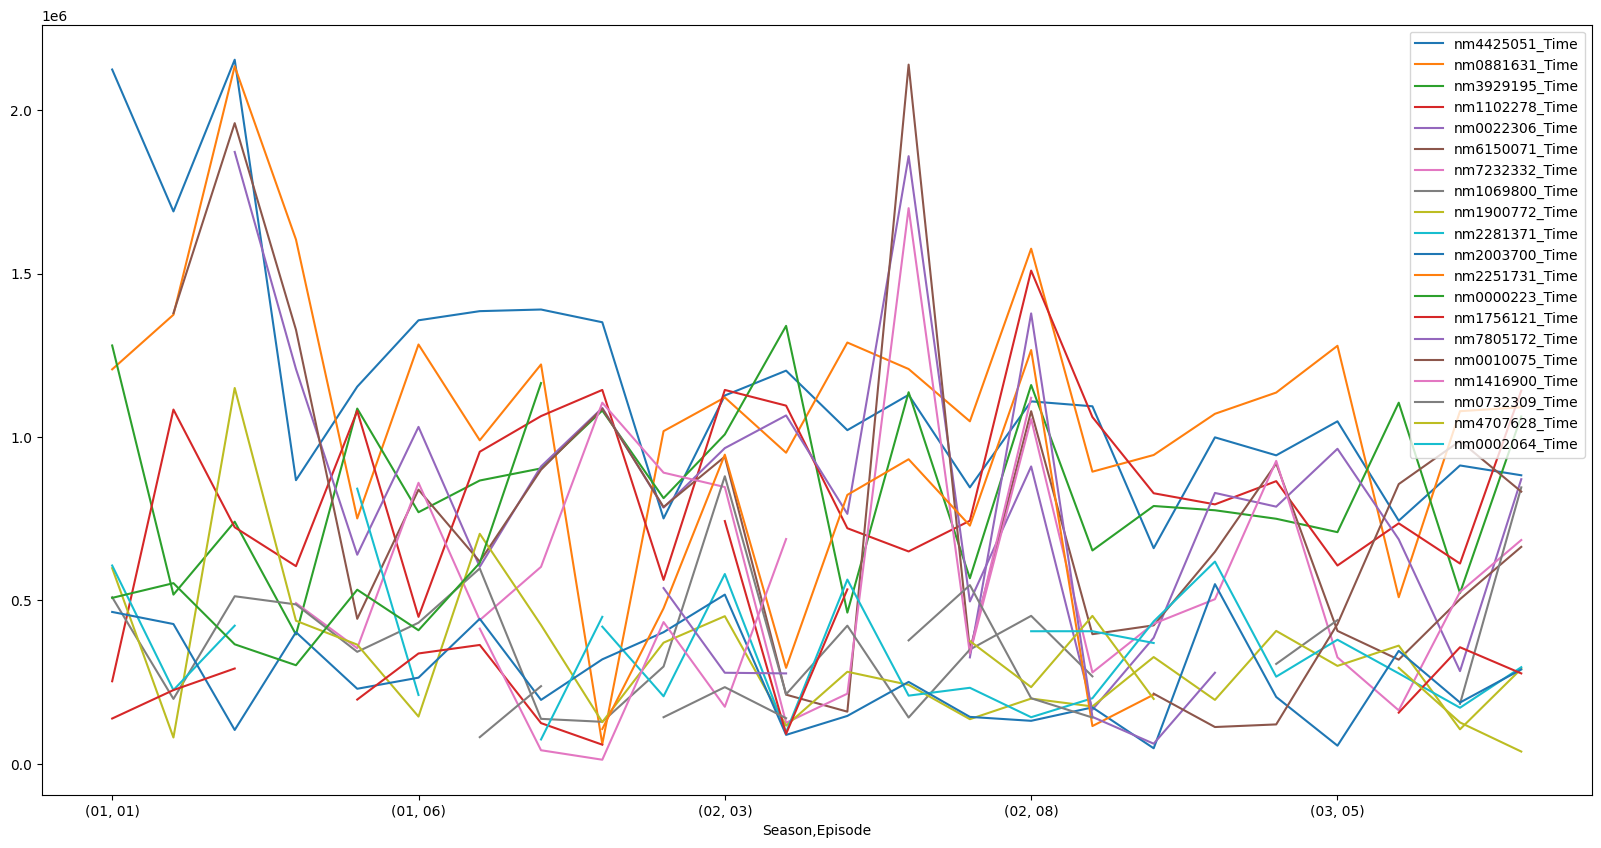

In [89]:
graph_pd.plot(figsize=(20,10))

In [90]:
appearance_season_df = pd.DataFrame(df.groupby(['Season','nconst'],as_index =False)['Duration'].sum())
appearance_season_df['Duration'] = appearance_season_df['Duration'].astype(int)

In [91]:
graph_pd_season = pd.DataFrame()
for character in df_new['nconst'].head(20):
    character_df = appearance_season_df.copy()[appearance_season_df['nconst']==character]
    character_df.set_index(['Season'], inplace= True)
    character_df.sort_index(inplace=True)
    character_df[f'{character}_Time'] = character_df['Duration']
    if(graph_pd_season.empty):
        graph_pd_season = character_df[[f'{character}_Time']]
    else:
        graph_pd_season = graph_pd_season.join(character_df[f'{character}_Time'])

C:\Users\baigs\AppData\Local\Temp\ipykernel_55564\1832775822.py:4: UserWarning: 
The palette list has fewer values (6) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.relplot(graph_pd_season,


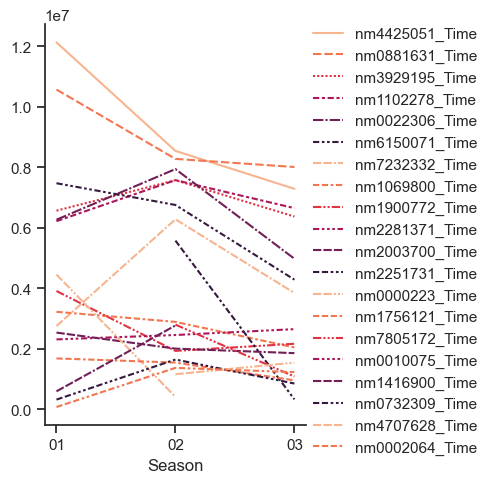

In [92]:
import seaborn as sns
sns.set_theme(style='ticks')
palette = sns.color_palette('rocket_r')
sns.relplot(graph_pd_season,
    kind="line", size_order=["T1", "T2"], palette=palette,
    height=5, aspect=.75, facet_kws=dict(sharex=False))
#graph_pd_season.plot(figsize=(20,10))